# COMS 6998: Quantum Computing
# Final Project
# Grover Factorization



In [0]:
!pip install qiskit==0.16.2

In [0]:
!pip install qiskit

In [0]:
from math import *
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [0]:
# Load quantum provider backend
IBMQ.save_account('f2e166dfcf7fe017018766af9b5f855fe698d22f7619ea8e7cd9a54e369e39fb896ac28078ccd4541b4d1f611e7e5d24ba45094b4253fc8b2b4701961e850d5c')
provider = IBMQ.load_account()

# provider = IBMQ.get_provider(hub='ibm-q-university', group='columbia-univers', project='comse-6998-2020')
# provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

Credentials already present. Set overwrite=True to overwrite.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

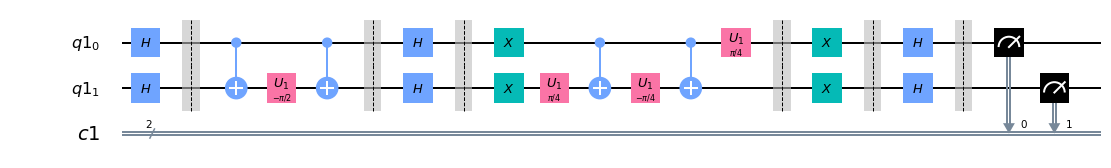

In [0]:
# For N = 4088459

phi = pi/4
theta = 2 * asin(sin(pi/6) / sin(phi) )
# the same as: theta = pi / 2

qr = QuantumRegister(2)   # Protocol uses 3 qubits
cx = ClassicalRegister(2)
qc = QuantumCircuit(qr, cx)

qc.h(0)
qc.h(1)
qc.barrier()

qc.cx(0, 1)
qc.u1(-theta,1)
qc.cx(0, 1)
qc.barrier()

qc.h(0)
qc.h(1)
qc.barrier()

qc.x(0)
qc.x(1)
qc.u1(theta/2,1)
qc.cx(0, 1)
qc.u1(-theta/2,1)
qc.cx(0, 1)
qc.u1(theta/2,0)
qc.barrier()

qc.x(0)
qc.x(1)
qc.barrier()

qc.h(0)
qc.h(1)
qc.barrier()

qc.measure(0,0)
qc.measure(1,1)
qc.draw('mpl')

{'11': 503, '00': 521}


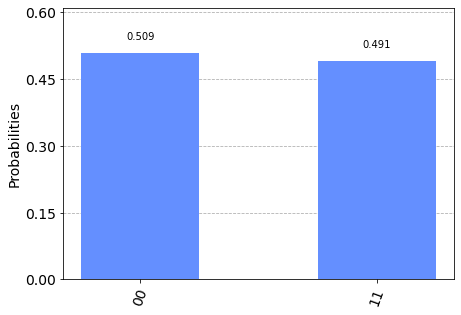

In [0]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

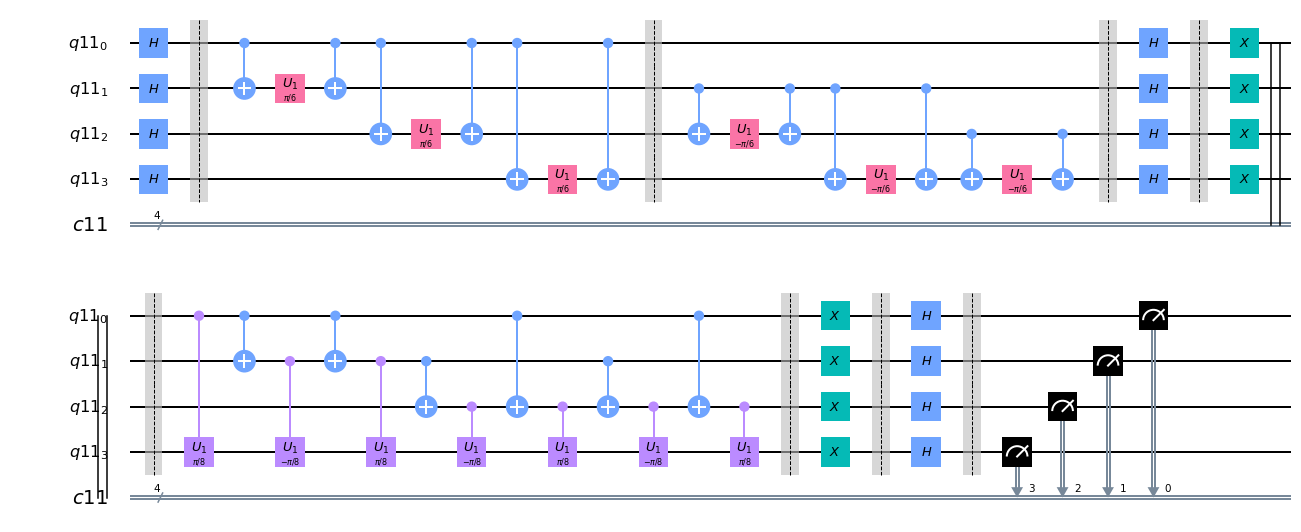

In [0]:
# For N = 966887
theta = 2/3 * asin(sqrt(2) / 2 )

qr = QuantumRegister(4)   # Protocol uses 3 qubits
cx = ClassicalRegister(4)
qc = QuantumCircuit(qr, cx)

qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.barrier()

qc.cx(0, 1)
qc.u1(theta,1)
qc.cx(0, 1)
qc.cx(0, 2)
qc.u1(theta,2)
qc.cx(0, 2)
qc.cx(0, 3)
qc.u1(theta,3)
qc.cx(0, 3)
qc.barrier()

qc.cx(1, 2)
qc.u1(-theta,2)
qc.cx(1, 2)
qc.cx(1, 3)
qc.u1(-theta,3)
qc.cx(1, 3)
qc.cx(2, 3)
qc.u1(-theta,3)
qc.cx(2, 3)
qc.barrier()

qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.barrier()

qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)
qc.barrier()

qc.cu1(3*theta/4,0,3)
qc.cx(0, 1)
qc.cu1(-3*theta/4,1,3)
qc.cx(0, 1)
qc.cu1(3*theta/4,1,3)
qc.cx(1, 2)
qc.cu1(-3*theta/4,2,3)
qc.cx(0, 2)
qc.cu1(3*theta/4,2,3)
qc.cx(1, 2)
qc.cu1(-3*theta/4,2,3)
qc.cx(0, 2)
qc.cu1(3*theta/4,2,3)
qc.barrier()

qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)
qc.barrier()

qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.barrier()

qc.measure(3,3)
qc.measure(2,2)
qc.measure(1,1)
qc.measure(0,0)
qc.draw('mpl')

{'0101': 57, '0000': 54, '0110': 51, '1001': 60, '1111': 53, '1000': 7, '1110': 261, '0001': 262, '1010': 46, '0011': 68, '0100': 13, '1011': 11, '0010': 11, '1100': 55, '1101': 4, '0111': 11}


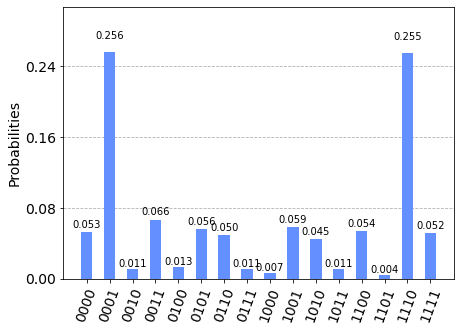

In [0]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

In [0]:
import numpy as np 
np.sqrt(3)/3

0.5773502691896257

In [0]:
from math import *
sin(pi/6) / (sqrt(3)/2) 


0.5773502691896257

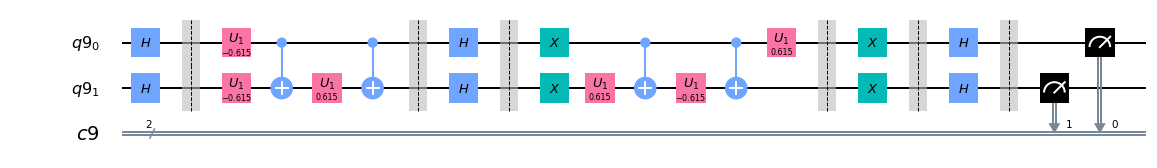

In [0]:
# For N = 175
theta = 2 * asin(sin(pi/6) / (sqrt(3)/2) )

qr = QuantumRegister(2)   # Protocol uses 3 qubits
cx = ClassicalRegister(2)
qc = QuantumCircuit(qr, cx)

qc.h(0)
qc.h(1)
qc.barrier()

qc.u1(-theta/2,0)
qc.u1(-theta/2,1)
qc.cx(0, 1)
qc.u1(theta/2,1)
qc.cx(0, 1)
qc.barrier()

qc.h(0)
qc.h(1)
qc.barrier()

qc.x(0)
qc.x(1)
qc.u1(theta/2,1)
qc.cx(0, 1)
qc.u1(-theta/2,1)
qc.cx(0, 1)
qc.u1(theta/2,0)
qc.barrier()

qc.x(0)
qc.x(1)
qc.barrier()

qc.h(0)
qc.h(1)
qc.barrier()

qc.measure(1,1)
qc.measure(0,0)
qc.draw('mpl')

{'10': 315, '00': 363, '01': 346}


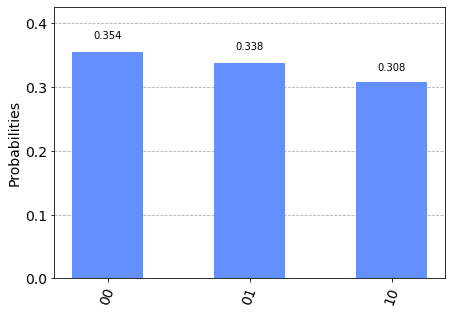

In [0]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

In [0]:
# Check whether a number is prime
def isPrime(n) : 
    if (n <= 1) : 
        return False
    if (n <= 3) : 
        return True
  
    if (n % 2 == 0 or n % 3 == 0) : 
        return False
  
    i = 5
    while(i * i <= n) : 
        if (n % i == 0 or n % (i + 2) == 0) : 
            return False
        i = i + 6
  
    return True

In [0]:
# Check whether prime is "valid"
# that fits in 1....1 form
def primeValid(n):
    b = "{0:b}".format(n)
    if b.endswith('1') and b.startswith('1'):
        return True 
    else:
        return False

In [0]:
def primesBinNum(n):
    return len("{0:b}".format(n))

def primesBinNumMatch(a, b):
    return len("{0:b}".format(a)) == len("{0:b}".format(b))

In [0]:
# Check num of diff binary bits
def numBinDiff(a, b): 
    count = 0 
    for i in range(0,32): 
        if ((( a >>  i) & 1) != (( b >>  i) & 1)):  
             count=count+1
    return count

In [0]:
primesBinNumMatch(5, 2017)

False

In [0]:
from collections import *

In [0]:
dic = defaultdict()
for i in range(2, 100000):
    if isPrime(i):
        if primeValid(i):
            binNum = primesBinNum(i)
            if binNum not in dic:
                dic[binNum] = [i]
            else:
                dic[binNum].append(i)
    

In [0]:
Diff_2 = []
for key in dic:
    lst = dic[key]
    for i in range(len(lst)):
        for j in range(i, len(lst)):
            a, b = lst[i], lst[j]
            if numBinDiff(a, b) == 2:
                Diff_2.append((a,b))

In [0]:
Diff_2[70000:70005]

[(80209, 96337),
 (80209, 96601),
 (80221, 80341),
 (80221, 80669),
 (80221, 80989)]

In [0]:
len(Diff_2)

82476

In [0]:
def check_1100(a, b):
    tmp = 0
    for i in range(0,32): 
        if ((( a >>  i) & 1) != (( b >>  i) & 1)):  
            tmp += (a>>i) & 1
    if tmp == 1:
        return False
    else:
        return True


In [0]:
Diff_2_1001 = []
for pair in Diff_2:
    if not check_1100(pair[0], pair[1]):
        Diff_2_1001.append(pair)

In [0]:
len(Diff_2_1001)

41654

In [0]:
lst = []
for pair in Diff_2_1001:
    num = pair[0] * pair[1]
    if num > 9000000000:
        lst.append(num)

In [0]:
print(lst)

[9003152533, 9008112889, 9004792969, 9008969713, 9013429921, 9010108993, 9014569489, 9015870467, 9020648401, 9003652249, 9027270947, 9037375969, 9016184329, 9037028201, 9043082089, 9044199013, 9044968193, 9045526691, 9003747761, 9027584689, 9039503153, 9048442001, 9031386409, 9032527081, 9050409769, 9057164881, 9016279577, 9062496361, 9072434417, 9071737033, 9084194773, 9084381347, 9086888809, 9004979353, 9099844289, 9011813953, 9107089093, 9107275907, 9097796153, 9105301993, 9094230289, 9120839509, 9025870993, 9098809249, 9122367973, 9122010361, 9121660817, 9123156769, 9124303249, 9034994929, 9106825201, 9124782769, 9129272161, 9112171129, 9135747493, 9136129909, 9136520513, 9128732969, 9140337013, 9120575041, 9151050373, 9136247209, 9148238633, 9160042691, 9119139857, 9166936547, 9178366369, 9178749673, 9190922281, 9103189633, 9197827729, 9188462873, 9105861673, 9011605649, 9191914769, 9197925073, 9013884233, 9203233001, 9206050691, 9207422929, 9017302649, 9203681593, 9115025929, 921

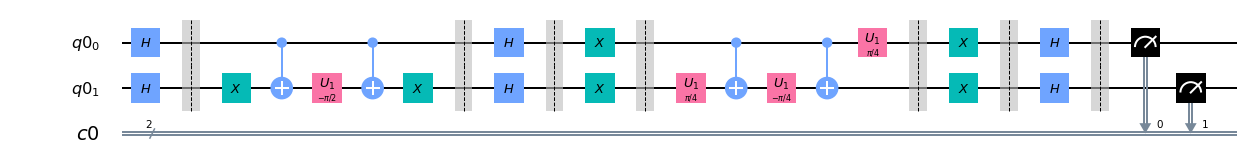

In [0]:
# Random trying...
phi = pi/4
theta = 2 * asin(sin(pi/6) / sin(phi) )

qr = QuantumRegister(2)   # Protocol uses 3 qubits
cx = ClassicalRegister(2)
qc = QuantumCircuit(qr, cx)



qc.h(0)
qc.h(1)
qc.barrier()

# qc.x(0)
qc.x(1)
qc.cx(0, 1)
qc.u1(-theta,1)
qc.cx(0, 1)
# qc.x(0)
qc.x(1)
qc.barrier()

qc.h(0)
qc.h(1)
qc.barrier()

qc.x(0)
qc.x(1)
qc.barrier()

qc.u1(theta/2,1)
qc.cx(0, 1)
qc.u1(-theta/2,1)
qc.cx(0, 1)
qc.u1(theta/2,0)
qc.barrier()

qc.x(0)
qc.x(1)
qc.barrier()

qc.h(0)
qc.h(1)
qc.barrier()

qc.measure(0,0)
qc.measure(1,1)
qc.draw('mpl')

{'01': 491, '10': 533}


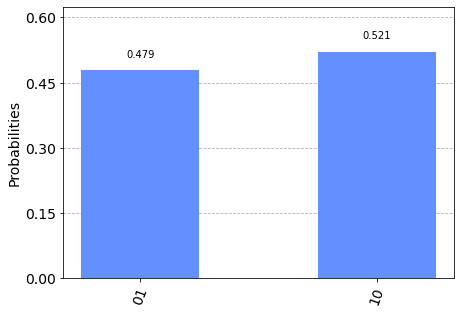

In [0]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

In [0]:
from qiskit.providers.ibmq import least_busy
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                    not b.configuration().simulator and b.status().operational==True))
job_exp = execute(qc, backend=backend, shots=8192)

exp_result = job_exp.result()
exp_measurement_result = exp_result.get_counts(qc)

Credentials are already in use. The existing account in the session will be replaced.


{'11': 369, '01': 3184, '00': 941, '10': 3698}


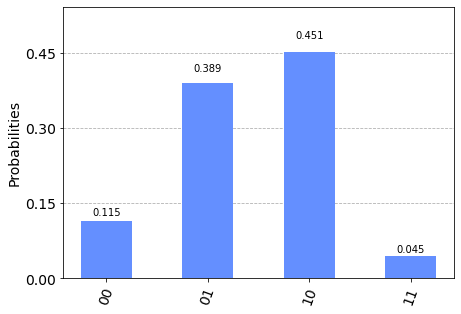

In [0]:
print(exp_measurement_result)
plot_histogram(exp_measurement_result)